## Import packages

In [1]:
# Import packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Sklearn Evaluation Metrics
from sklearn import metrics

# Visualizes all the columns
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
%%capture
from google.colab import drive
drive.mount('/content/drive')

# 1. Important function

In [3]:
# Bar plot for visualization of row data
def create_bar_plot(data, x_axis, y_axis, title):
    plt.figure(figsize=(15, 10))
    sns.barplot(x=x_axis, y=y_axis, data=data, palette='viridis')
    plt.title(title)
    plt.grid(True, alpha = 0.2)
    plt.tight_layout()
    plt.show


# Function to find which columns are important for each type of model
def create_new_data(model, data, model_type):

    if model_type == "logisticregression":
        coeff = model.named_steps[model_type].coef_[0]
        important_feature = pd.DataFrame({'Feature': data.columns, 'Importance': np.abs(coeff)})
    else:
        important_feature = pd.DataFrame({'Feature': data.columns, 'Importance': model.feature_importances_})

    important_feature = important_feature.sort_values('Importance', ascending=False)

    return important_feature


# Function to create confusion matrix for each type of model
def create_confusion_matrix(y_value, y_pred, title = 'Confusion Matrix'):
    conf_matrix = metrics.confusion_matrix(y_value, y_pred)

    # Display the  confusion matrix
    # Class 1 means candidate and 0 otherwise
    display_conf = metrics.ConfusionMatrixDisplay(
        conf_matrix,
        display_labels=['Class 0', 'Class 1']
        )

    display_conf.plot(cmap='Blues', values_format='d')

    plt.title(title)
    plt.show()

# Function to create the ROC CURVE for each type of model
def create_roc_curve(y_value, y_pred):
    FPR, TPR, thresholds = metrics.roc_curve(y_value, y_pred)
    roc_auc = metrics.auc(FPR, TPR)
    display_roc = metrics.RocCurveDisplay(fpr=FPR, tpr=TPR, roc_auc=roc_auc)
    display_roc.plot()
    plt.grid(True, alpha = 0.2)
    plt.show()


# Order of parameters in the confusion matrix

# Order: TN, FP, FN, TP

# TN: True Negatives, FP: False Positives, FN: False Negatives, TP: True Positives

# 2 . Import the data

In [4]:
# Read the data
data = pd.read_csv('/data/exoplanets_2018.csv')

# print the shape of the data
print(data.shape)

# Show the top 5 rows of the dataset
data.head()

(9564, 49)


,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.780000e-05,-2.780000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,616.0,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.480000e-04,-2.480000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,875.0,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10800.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8080.0,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.0,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


# 3 . Data preparation

## Let's take a look at the columns name

In [5]:
data.columns

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

The current column names lack clarity and consistency. In an effort to enhance readability, we are simplifying and standardizing the names based on the detailed descriptions for each column [here](https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html).

In [6]:
data = data.rename(
    columns={
        'kepid': 'ID',
        'kepoi_name': 'KOIName',
        'kepler_name': 'KeplerName',
        'koi_disposition': 'DispArch',
        'koi_pdisposition': 'DispKepler',
        'koi_score': 'DispScore',
        'koi_fpflag_nt': 'NotTransitFlag',
        'koi_fpflag_ss': 'StellarEclipseFlag',
        'koi_fpflag_co': 'CentroidOffsetFlag',
        'koi_fpflag_ec': 'EphemerisContamFlag',
        'koi_period': 'OrbitalPeriod',
        'koi_period_err1': 'OrbPeriodPosErr',
        'koi_period_err2': 'OrbPeriodNegErr',
        'koi_time0bk': 'TransitEpoch',
        'koi_time0bk_err1': 'TransitEpochPosErr',
        'koi_time0bk_err2': 'TransitEpochNegErr',
        'koi_impact': 'ImpactParameter',
        'koi_impact_err1': 'ImpactParamPosErr',
        'koi_impact_err2': 'ImpactParamNegErr',
        'koi_duration': 'TransitDuration',
        'koi_duration_err1': 'TransitDurPosErr',
        'koi_duration_err2': 'TransitDurNegErr',
        'koi_depth': 'TransitDepth',
        'koi_depth_err1': 'TransitDepthPosErr',
        'koi_depth_err2': 'TransitDepthNegErr',
        'koi_prad': 'PlanetaryRadius',
        'koi_prad_err1': 'PlanRadPosErr',
        'koi_prad_err2': 'PlanRadNegErr',
        'koi_teq': 'EquilibriumTemperature',
        'koi_teq_err1': 'EquilTempPosErr',
        'koi_teq_err2': 'EquilTempNegErr',
        'koi_insol': 'InsolationFlux',
        'koi_insol_err1': 'InsolFluxPosErr',
        'koi_insol_err2': 'InsolFluxNegErr',
        'koi_model_snr': 'TransitSNR',
        'koi_tce_plnt_num': 'TCEPlanetNumber',
        'koi_tce_delivname': 'TCEDeliveryName',
        'koi_steff': 'StellarEffTemp',
        'koi_steff_err1': 'StellarEffTempPosErr',
        'koi_steff_err2': 'StellarEffTempNegErr',
        'koi_slogg': 'StellarSurfaceGravity',
        'koi_slogg_err1': 'StellarSurfaceGravityPosErr',
        'koi_slogg_err2': 'StellarSurfaceGravityNegErr',
        'koi_srad': 'StellarRadius',
        'koi_srad_err1': 'StellarRadiusPosErr',
        'koi_srad_err2': 'StellarRadiusNegErr',
        'ra': 'RA',
        'dec': 'Dec',
        'koi_kepmag': 'KeplerBand'
    }
)

In [7]:
data.head()

,ID,KOIName,KeplerName,DispArch,DispKepler,DispScore,NotTransitFlag,StellarEclipseFlag,CentroidOffsetFlag,EphemerisContamFlag,OrbitalPeriod,OrbPeriodPosErr,OrbPeriodNegErr,TransitEpoch,TransitEpochPosErr,TransitEpochNegErr,ImpactParameter,ImpactParamPosErr,ImpactParamNegErr,TransitDuration,TransitDurPosErr,TransitDurNegErr,TransitDepth,TransitDepthPosErr,TransitDepthNegErr,PlanetaryRadius,PlanRadPosErr,PlanRadNegErr,EquilibriumTemperature,EquilTempPosErr,EquilTempNegErr,InsolationFlux,InsolFluxPosErr,InsolFluxNegErr,TransitSNR,TCEPlanetNumber,TCEDeliveryName,StellarEffTemp,StellarEffTempPosErr,StellarEffTempNegErr,StellarSurfaceGravity,StellarSurfaceGravityPosErr,StellarSurfaceGravityNegErr,StellarRadius,StellarRadiusPosErr,StellarRadiusNegErr,RA,Dec,KeplerBand
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.780000e-05,-2.780000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,616.0,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.480000e-04,-2.480000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,875.0,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10800.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8080.0,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.0,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


Let's create new columns in the DataFrame to enhance our representation of exoplanets. A `ExoplanetCandidate` column will indicate candidacy, with a value of 1 for 'CANDIDATE' and 0 otherwise. The `ExoplanetConfirmed` column will represent confirmation status, assigning a value of 2 for `CONFIRMED`, 1 for `CANDIDATE`, and 0 for other dispositions.

In [8]:
# Create 'ExoplanetCandidate' column
data["ExoplanetCandidate"] = (data["DispKepler"] == "CANDIDATE").astype(int)

In [10]:
data.head()

,ID,KOIName,KeplerName,DispArch,DispKepler,DispScore,NotTransitFlag,StellarEclipseFlag,CentroidOffsetFlag,EphemerisContamFlag,OrbitalPeriod,OrbPeriodPosErr,OrbPeriodNegErr,TransitEpoch,TransitEpochPosErr,TransitEpochNegErr,ImpactParameter,ImpactParamPosErr,ImpactParamNegErr,TransitDuration,TransitDurPosErr,TransitDurNegErr,TransitDepth,TransitDepthPosErr,TransitDepthNegErr,PlanetaryRadius,PlanRadPosErr,PlanRadNegErr,EquilibriumTemperature,EquilTempPosErr,EquilTempNegErr,InsolationFlux,InsolFluxPosErr,InsolFluxNegErr,TransitSNR,TCEPlanetNumber,TCEDeliveryName,StellarEffTemp,StellarEffTempPosErr,StellarEffTempNegErr,StellarSurfaceGravity,StellarSurfaceGravityPosErr,StellarSurfaceGravityNegErr,StellarRadius,StellarRadiusPosErr,StellarRadiusNegErr,RA,Dec,KeplerBand,ExoplanetCandidate
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,2.780000e-05,-2.780000e-05,170.538750,0.002160,-0.002160,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,616.0,19.5,-19.5,2.26,0.26,-0.15,793.0,NaN,NaN,93.59,29.45,-16.65,35.8,1.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,2.480000e-04,-2.480000e-04,162.513840,0.003520,-0.003520,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,875.0,35.5,-35.5,2.83,0.32,-0.19,443.0,NaN,NaN,9.11,2.87,-1.62,25.8,2.0,q1_q17_dr25_tce,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347,1
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,0.969,5.126,-0.077,1.78220,0.03410,-0.03410,10800.0,171.0,-171.0,14.60,3.92,-1.31,638.0,NaN,NaN,39.30,31.04,-10.49,76.3,1.0,q1_q17_dr25_tce,5853.0,158.0,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436,1
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,1.276,0.115,-0.092,2.40641,0.00537,-0.00537,8080.0,12.8,-12.8,33.46,8.50,-2.83,1395.0,NaN,NaN,891.96,668.95,-230.35,505.6,1.0,q1_q17_dr25_tce,5805.0,157.0,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597,0
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,0.701,0.235,-0.478,1.65450,0.04200,-0.04200,603.0,16.9,-16.9,2.75,0.88,-0.35,1406.0,NaN,NaN,926.16,874.33,-314.24,40.9,1.0,q1_q17_dr25_tce,6031.0,169.0,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509,1


### Let's find if there are null values in each column or not

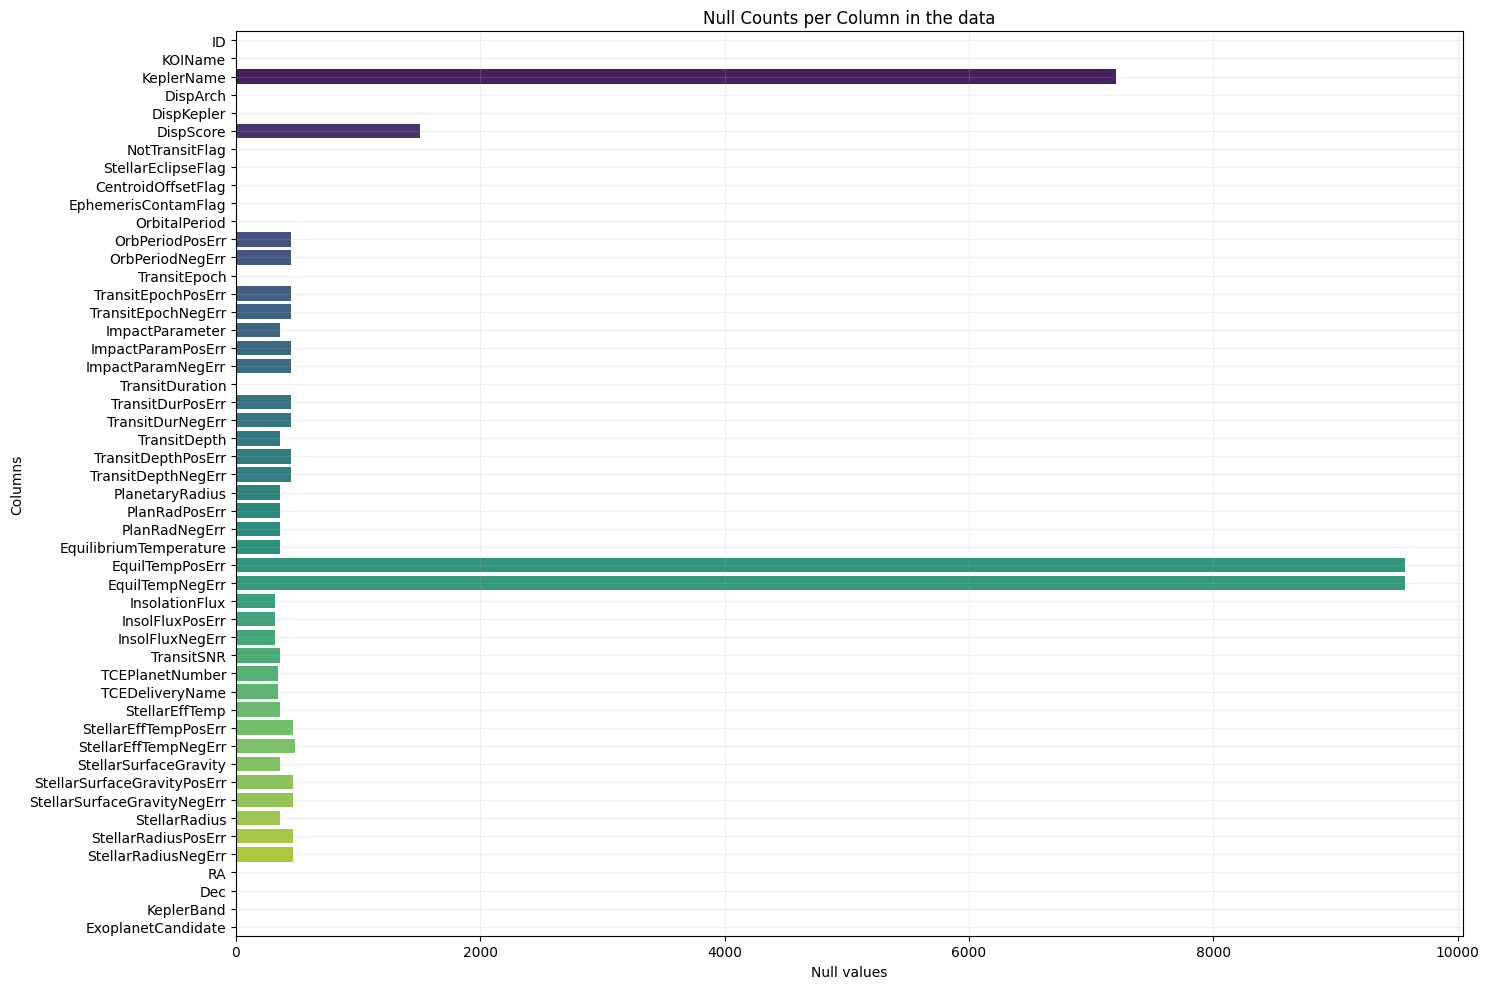

In [11]:
# Get the null values per column
null_per_col = data.isnull().sum().to_frame().reset_index()
null_per_col = null_per_col.rename(columns={'index': 'Columns', 0: 'Null values'})

# Call our function to plot it
create_bar_plot(null_per_col, 'Null values', 'Columns', 'Null Counts per Column in the data')

We have identified columns requiring removal due to a significant prevalence of null values. Additionally, certain columns, notably those containing identifiers and names, are considered non-essential. The removal of these columns is deemed beneficial for the logistic regression fitting process, enhancing model performance and interpretability by mitigating the impact of irrelevant or sparse data.

In [12]:
%%capture
data.drop(columns=
    ["ID",
     "KeplerName",
     "KOIName",
     "NotTransitFlag",
     "EquilTempPosErr",
     "EquilTempNegErr",
     "DispArch",
     "DispKepler",
     "TCEDeliveryName"
     ], inplace=True
    )

### Find if there are nan values

In [13]:
data.isna().any()

DispScore                       True
StellarEclipseFlag             False
CentroidOffsetFlag             False
EphemerisContamFlag            False
OrbitalPeriod                  False
OrbPeriodPosErr                 True
OrbPeriodNegErr                 True
TransitEpoch                   False
TransitEpochPosErr              True
TransitEpochNegErr              True
ImpactParameter                 True
ImpactParamPosErr               True
ImpactParamNegErr               True
TransitDuration                False
TransitDurPosErr                True
TransitDurNegErr                True
TransitDepth                    True
TransitDepthPosErr              True
TransitDepthNegErr              True
PlanetaryRadius                 True
PlanRadPosErr                   True
PlanRadNegErr                   True
EquilibriumTemperature          True
InsolationFlux                  True
InsolFluxPosErr                 True
InsolFluxNegErr                 True
TransitSNR                      True
T

### Remove nan values

In [14]:
data.dropna(inplace=True)

In [15]:
# Show the summary statistics
data.describe()

,DispScore,StellarEclipseFlag,CentroidOffsetFlag,EphemerisContamFlag,OrbitalPeriod,OrbPeriodPosErr,OrbPeriodNegErr,TransitEpoch,TransitEpochPosErr,TransitEpochNegErr,ImpactParameter,ImpactParamPosErr,ImpactParamNegErr,TransitDuration,TransitDurPosErr,TransitDurNegErr,TransitDepth,TransitDepthPosErr,TransitDepthNegErr,PlanetaryRadius,PlanRadPosErr,PlanRadNegErr,EquilibriumTemperature,InsolationFlux,InsolFluxPosErr,InsolFluxNegErr,TransitSNR,TCEPlanetNumber,StellarEffTemp,StellarEffTempPosErr,StellarEffTempNegErr,StellarSurfaceGravity,StellarSurfaceGravityPosErr,StellarSurfaceGravityNegErr,StellarRadius,StellarRadiusPosErr,StellarRadiusNegErr,RA,Dec,KeplerBand,ExoplanetCandidate
count,7803.000000,7803.000000,7803.000000,7803.000000,7803.000000,7.803000e+03,7.803000e+03,7803.000000,7803.000000,7803.000000,7803.000000,7803.000000,7803.000000,7803.000000,7803.000000,7803.000000,7803.000000,7803.000000,7803.000000,7803.000000,7803.000000,7803.000000,7803.000000,7.803000e+03,7.803000e+03,7.803000e+03,7803.000000,7803.000000,7803.000000,7803.000000,7803.000000,7803.000000,7803.000000,7803.000000,7803.000000,7803.000000,7803.000000,7803.000000,7803.000000,7803.000000,7803.000000
mean,0.491614,0.265667,0.217993,0.133538,37.314267,9.484169e-04,-9.484169e-04,157.877359,0.007563,-0.007563,0.609685,2.122407,-0.286277,5.349509,0.250288,-0.250288,25729.187646,62.516071,-62.516071,26.965784,6.662184,-7.301206,1133.811739,7.679770e+03,3.276928e+03,-4.005698e+03,298.205267,1.240164,5689.239780,142.235038,-159.049084,4.320219,0.120392,-0.131442,1.678491,0.317228,-0.371328,292.073715,43.836122,14.309852,0.520569
std,0.477082,0.441716,0.412909,0.340177,86.826061,5.021474e-03,5.021474e-03,57.892061,0.020448,0.020448,0.707276,9.913439,0.474845,6.198227,0.529689,0.529689,83510.996955,245.862869,245.862869,313.055376,109.511975,134.183732,832.013752,1.679499e+05,5.109840e+04,9.389641e+04,853.877036,0.648577,788.589568,47.912543,74.361117,0.420923,0.132785,0.067304,5.871606,0.851312,1.881014,4.787246,3.599892,1.335016,0.499609
min,0.000000,0.000000,0.000000,0.000000,0.259820,1.100000e-08,-1.340000e-01,120.565925,0.000009,-0.569000,0.000000,0.000000,-18.330000,0.302800,0.000000,-13.200000,4.500000,0.000000,-13700.000000,0.140000,0.000000,-11600.000000,92.000000,2.000000e-02,0.000000e+00,-5.600031e+06,2.400000,1.000000,2661.000000,0.000000,-1762.000000,0.047000,0.000000,-0.777000,0.109000,0.000000,-103.825000,279.856080,36.577381,6.966000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2.455472,4.225000e-06,-1.340000e-04,132.633560,0.000998,-0.007810,0.213000,0.037000,-0.450000,2.417000,0.042700,-0.256000,162.000000,8.900000,-42.400000,1.410000,0.220000,-2.260000,610.000000,3.263500e+01,1.515500e+01,-3.326000e+02,14.400000,1.000000,5306.500000,103.000000,-195.000000,4.228000,0.044000,-0.188000,0.826000,0.120000,-0.234000,288.681730,40.814960,13.519000,0.000000
50%,0.475000,0.000000,0.000000,0.000000,7.698431,2.450000e-05,-2.450000e-05,136.016200,0.003300,-0.003300,0.579000,0.186000,-0.195000,3.736000,0.116000,-0.116000,448.000000,18.400000,-18.400000,2.460000,0.470000,-0.320000,934.000000,1.801400e+02,9.717000e+01,-5.450000e+01,27.400000,1.000000,5753.000000,156.000000,-158.000000,4.442000,0.071000,-0.121000,0.993000,0.232000,-0.111000,292.294590,43.718182,14.582000,1.000000
75%,0.999000,1.000000,0.000000,0.000000,24.089219,1.340000e-04,-4.225000e-06,159.775731,0.007810,-0.000998,0.907500,0.383000,-0.040000,5.973000,0.256000,-0.042700,1865.000000,42.400000,-8.900000,19.015000,3.130000,-0.140000,1426.000000,9.759750e+02,6.055750e+02,-9.255000e+00,99.350000,1.000000,6100.000000,174.000000,-105.500000,4.545000,0.149000,-0.087000,1.319500,0.333000,-0.069000,295.895305,46.734850,15.333500,1.000000
max,1.000000,1.000000,1.000000,1.000000,1071.232624,1.340000e-01,-1.100000e-08,1472.522306,0.569000,-0.000009,25.224000,85.540000,0.000000,138.540000,13.200000,0.000000,922000.000000,13700.000000,0.000000,26042.900000,9460.000000,0.000000,14667.000000,1.094755e+07,3

# 4. Model creation

## Feature and target extraction

In [16]:
not_column_feature = ~data.columns.isin(['ExoplanetCandidate'])
features = data.loc[:, not_column_feature]
target = data.ExoplanetCandidate

## Create train and test data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.4, random_state = 42)

### 4.1 Logistic Regression model

In [18]:
%%capture
# Logistic regression
lr_model = make_pipeline(
    StandardScaler(),
    LogisticRegression(C=100,
                       max_iter=1000,
                       class_weight='balanced',
                       solver='sag')
)

# Fitting the model
lr_model.fit(X_train, y_train)

# Make prediction
y_hat_lr = lr_model.predict(X_test)

Extract important column feature

In [19]:
# Create new data frame to visualize which column is most
# important during Logistic regression training

feature_importance_lr = create_new_data(lr_model, features, 'logisticregression')

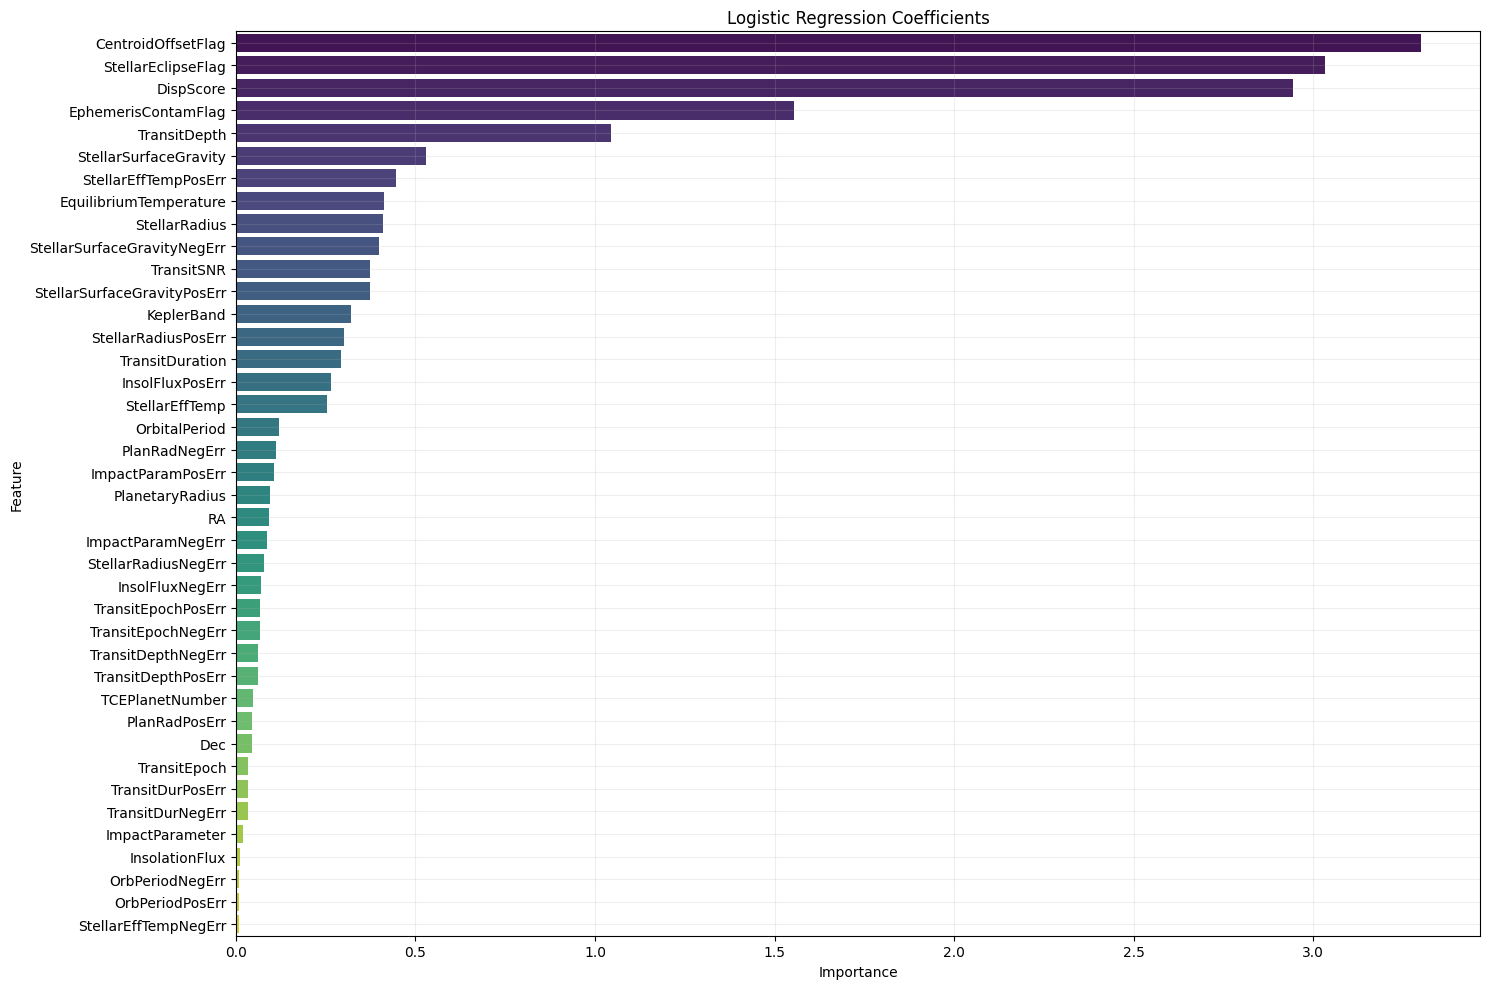

In [20]:
# Visualize the most important column feature
create_bar_plot(feature_importance_lr, 'Importance', 'Feature', 'Logistic Regression Coefficients')

From this bar plot, we can see which columns the model give higher coefficients.

#### Plot the confusion matrix for the logistic regression model

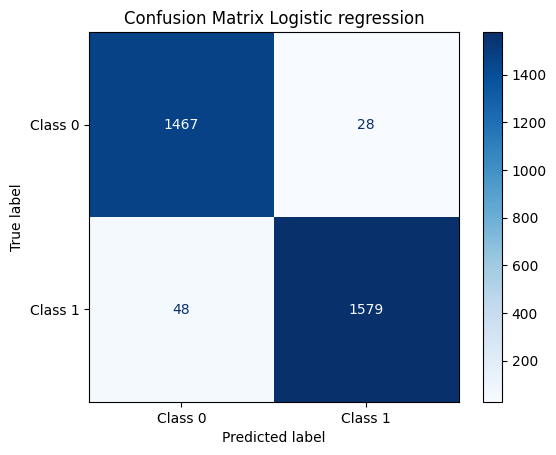

In [21]:
# Confusion matrix
create_confusion_matrix(y_test, y_hat_lr, title = 'Confusion Matrix Logistic regression')

#### Plot the ROC CURVE for the logistic regression model

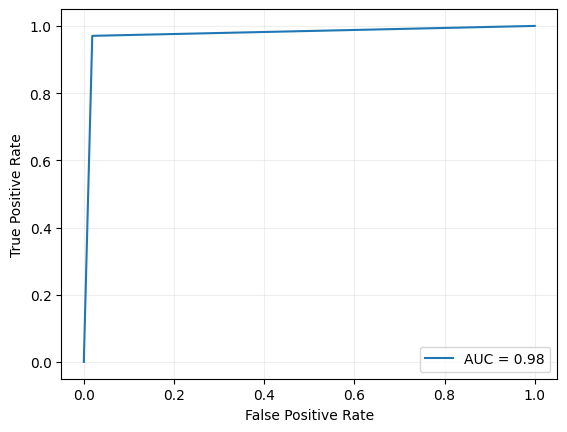

In [22]:
create_roc_curve(y_test, y_hat_lr)

#### Print classification report

In [23]:
print(metrics.classification_report(y_test, y_hat_lr))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1495
           1       0.98      0.97      0.98      1627

    accuracy                           0.98      3122
   macro avg       0.98      0.98      0.98      3122
weighted avg       0.98      0.98      0.98      3122



# That's for the Logistic regression model, now let's try Decision Tree classifier

### 4.2 Decision Tree classifier

In [24]:
dt_model = DecisionTreeClassifier(random_state=42)

#Fitting the model
dt_model.fit(X_train, y_train)

# Make prediction
y_hat_dt = dt_model.predict(X_test)

Extract important column feature

In [25]:
# Create new data frame to visualize which column is most
# important during Decision Tree training

feature_importance_dt = create_new_data(dt_model, features, None)

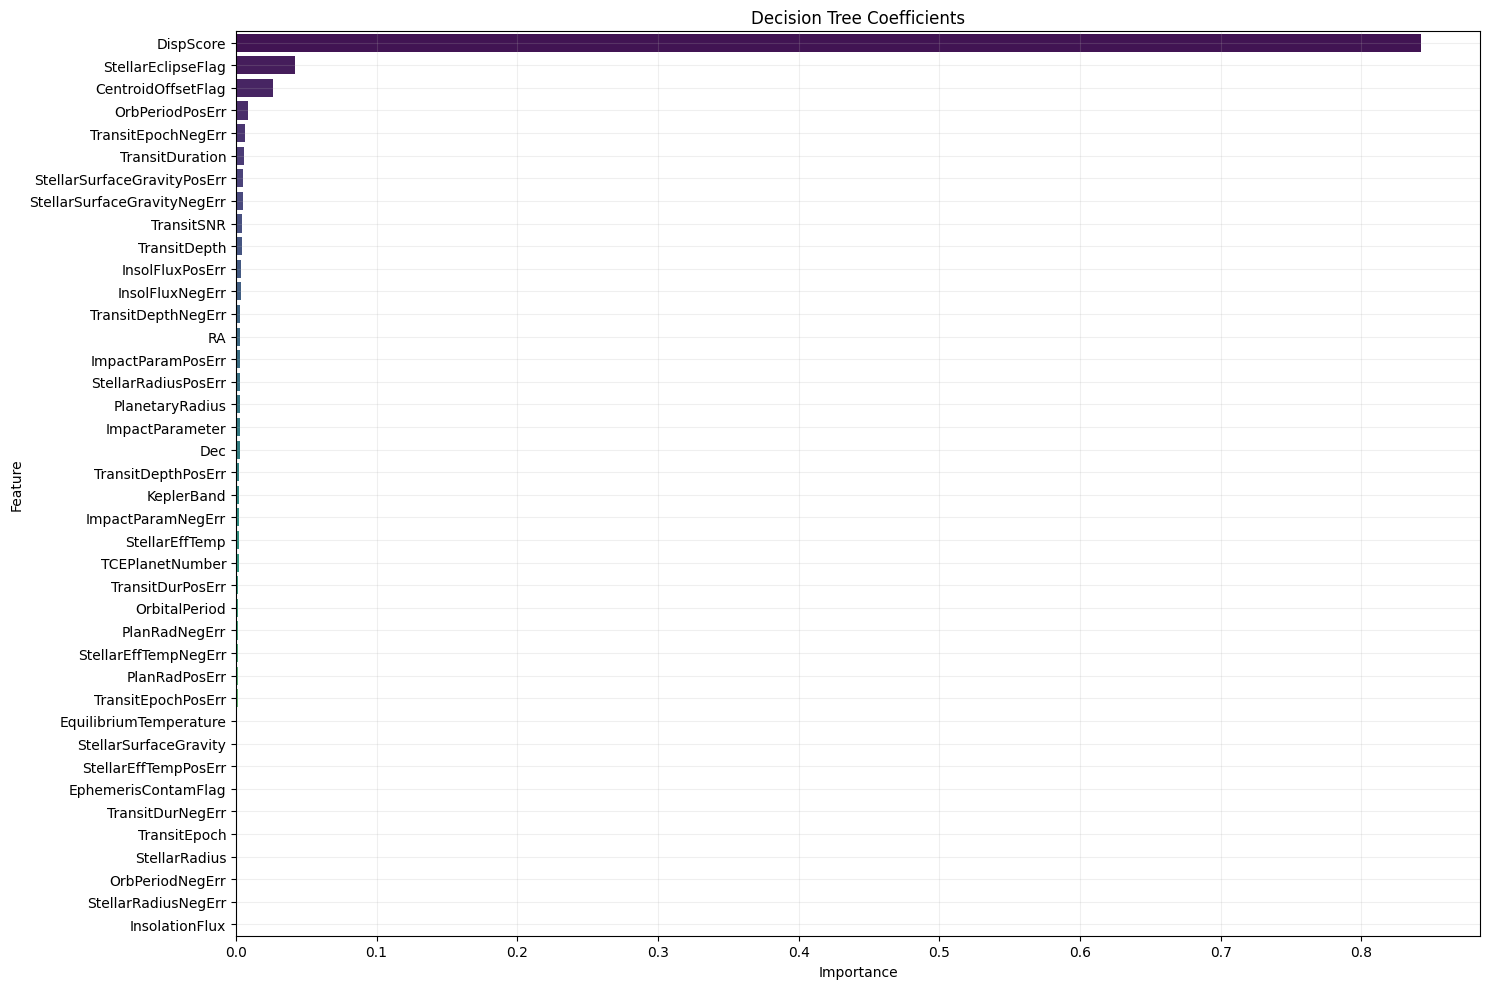

In [26]:
# Visualize the most important column feature
create_bar_plot(feature_importance_dt, 'Importance', 'Feature', 'Decision Tree Coefficients')

#### Plot the confusion matrix for the Decision Tree model

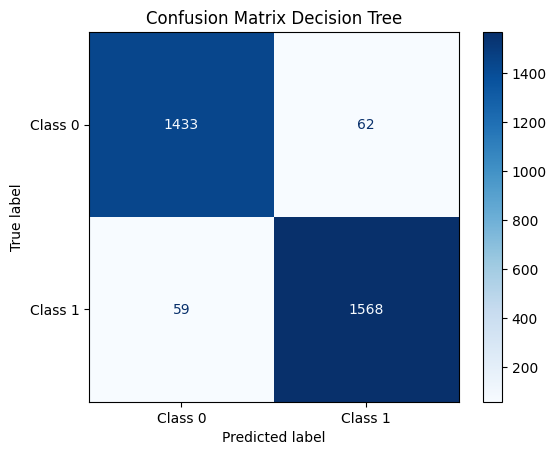

In [27]:
# Confusion matrix
create_confusion_matrix(y_test, y_hat_dt, title = 'Confusion Matrix Decision Tree')

#### Plot the ROC CURVE for the Decision Tree model

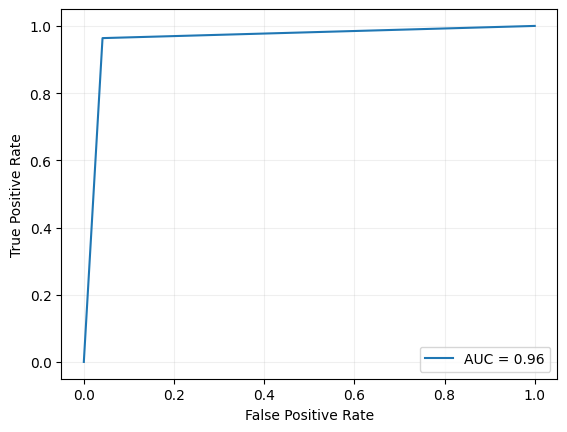

In [28]:
create_roc_curve(y_test, y_hat_dt)

#### Print classification report

In [29]:
print(metrics.classification_report(y_test, y_hat_dt))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1495
           1       0.96      0.96      0.96      1627

    accuracy                           0.96      3122
   macro avg       0.96      0.96      0.96      3122
weighted avg       0.96      0.96      0.96      3122



# Now, let's train the data with KNN model

### 4.3 KNN classifier

In [30]:
# Create the knn model
knn_model = KNeighborsClassifier(leaf_size=15, metric='minkowski', weights='uniform')

# Fitting the model
knn_model.fit(X_train, y_train)

# Make prediction
y_hat_knn = knn_model.predict(X_test)

#### Plot the confusion matrix for the Decision Tree model

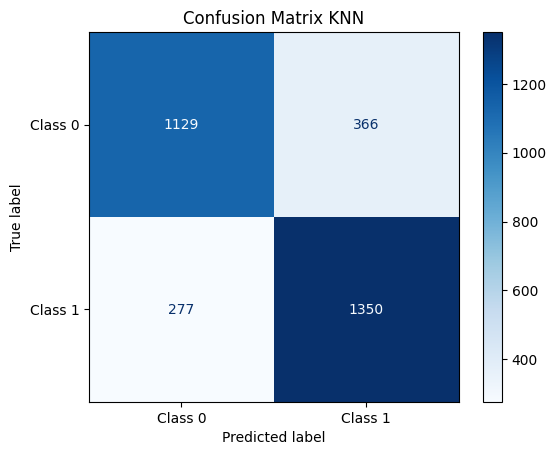

In [31]:
# Confusion matrix
create_confusion_matrix(y_test, y_hat_knn, title = 'Confusion Matrix KNN')

#### Plot the ROC CURVE for the KNN model

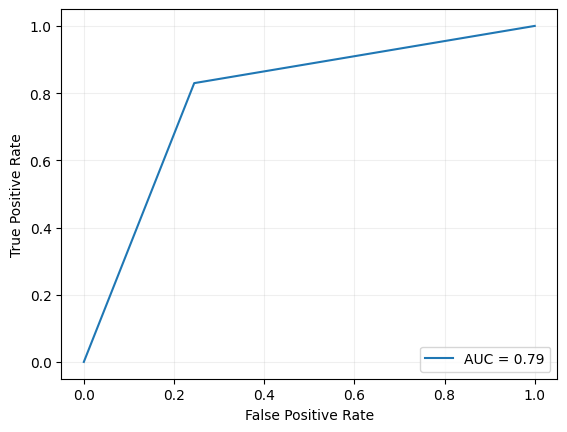

In [32]:
create_roc_curve(y_test, y_hat_knn)

In [33]:
# Print classification report
print(metrics.classification_report(y_test, y_hat_knn))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1495
           1       0.79      0.83      0.81      1627

    accuracy                           0.79      3122
   macro avg       0.79      0.79      0.79      3122
weighted avg       0.79      0.79      0.79      3122



## Now, let's train the data with random forest

### 4.4 Random Forest Classifier

In [35]:
# Create the model
rf_model = RandomForestClassifier(n_estimators=100, criterion='gini')

# Fitting the model
rf_model.fit(X_train, y_train)

# make prediction
y_hat_rf = rf_model.predict(X_test)

Extract important column feature

In [36]:
# Create new data frame to visualize which column is most
# important during Decision Tree training

feature_importance_rf = create_new_data(rf_model, features, None)

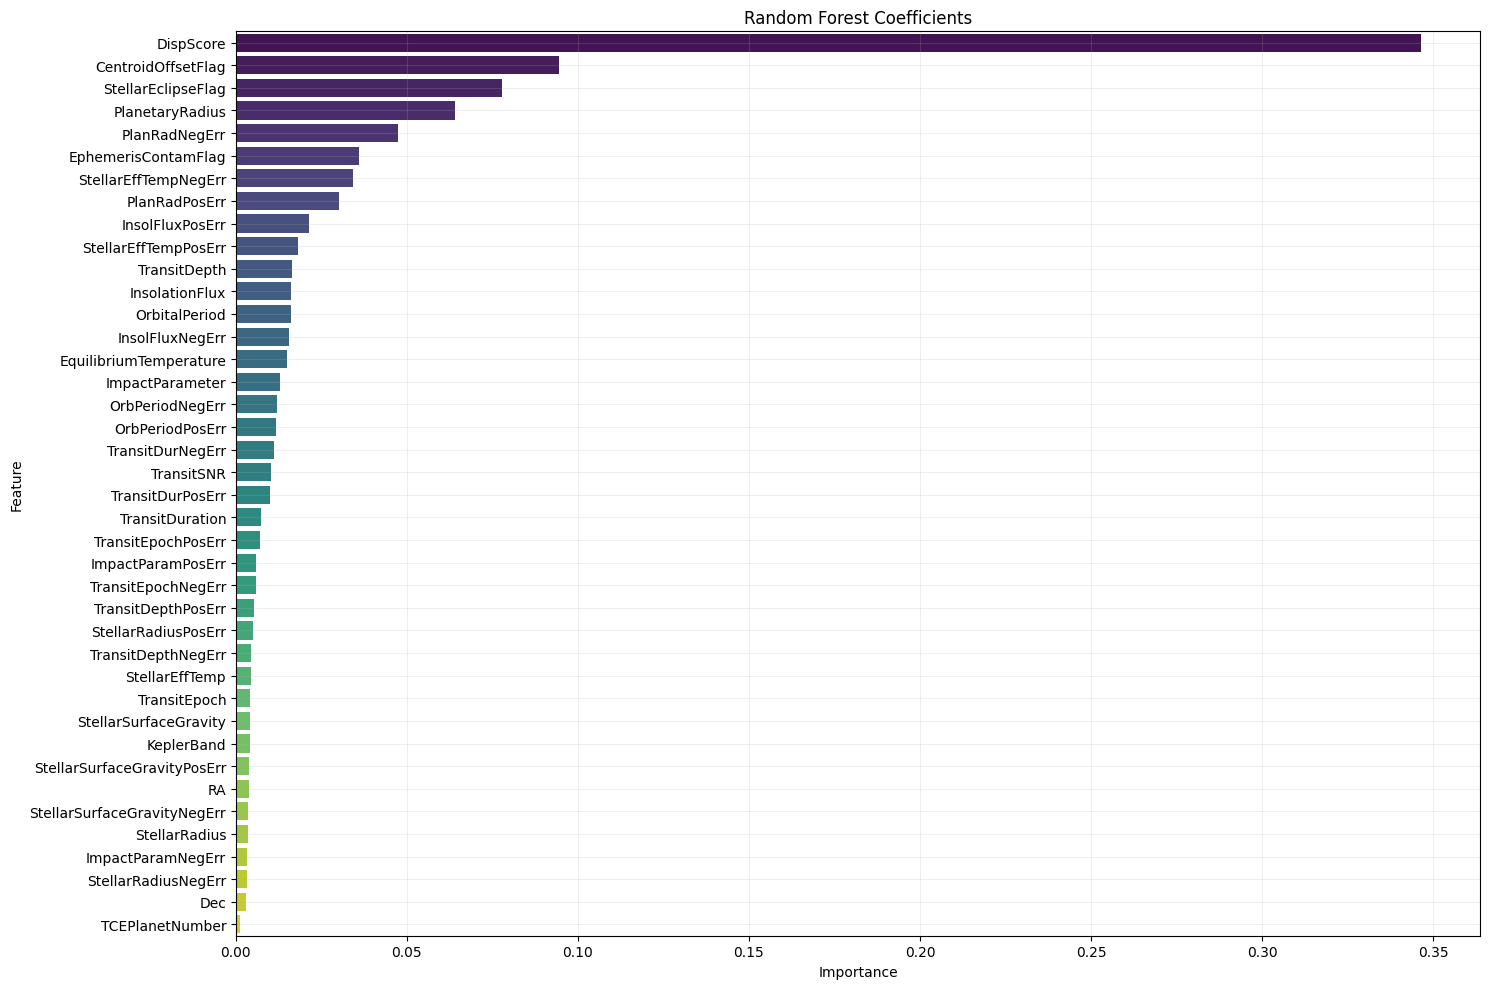

In [37]:
# Visualize the most important column feature
create_bar_plot(feature_importance_rf, 'Importance', 'Feature', 'Random Forest Coefficients')

#### Plot the confusion matrix for the Random Forest model

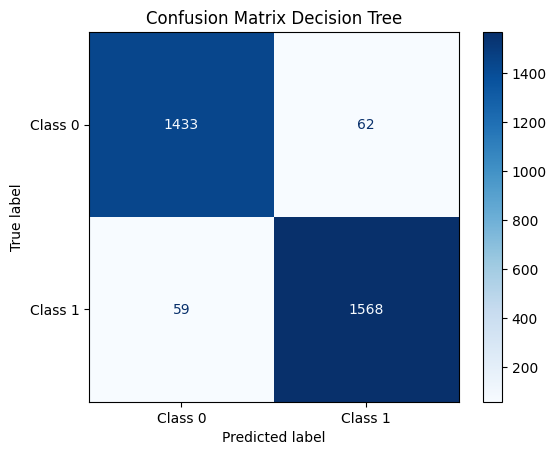

In [38]:
# Confusion matrix
create_confusion_matrix(y_test, y_hat_dt, title = 'Confusion Matrix Decision Tree')

#### Plot the ROC CURVE for the Random Forest model

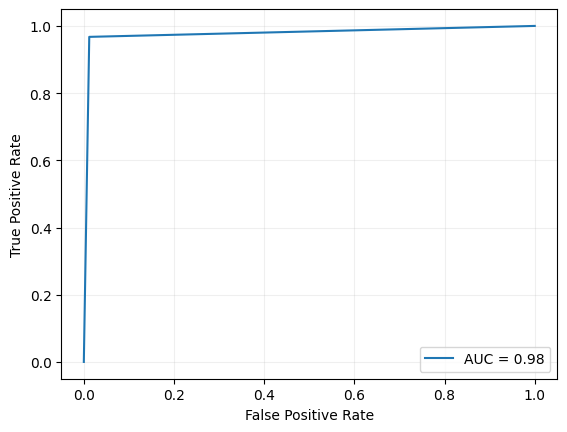

In [39]:
create_roc_curve(y_test, y_hat_rf)

In [40]:
# Print classification report
print(metrics.classification_report(y_test, y_hat_rf))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1495
           1       0.99      0.97      0.98      1627

    accuracy                           0.98      3122
   macro avg       0.98      0.98      0.98      3122
weighted avg       0.98      0.98      0.98      3122

